<hr style="border:2px solid gray"> </hr>

# Preprocessing

## Author : Huisung Son

<hr style="border:2px solid gray"> </hr>

# Step 0. Import Packages and Variables

In [1]:
# package list
import os, glob, numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import h5py

img_path = './image'
category_file_name = 'Categories.txt'
train_name = 'train.hdf5'
test_name = 'test.hdf5'

image_h = 220
image_w = 220
pixels = image_h * image_w * 3

categories = []

# Step 1. Load Category File

In [10]:
def NormalizeLabel(Label):
    arr = [0 for i in range(classes)]
    arr[Label] = 1
    return arr

In [11]:
import codecs
category_file = codecs.open(category_file_name, 'r', 'utf-8')
categories = list(map(str.strip, category_file.readlines()))
classes = len(categories)

# Step 2. Load Image, Preprocess, and Save

In [12]:
X = []
y = []

for idx, cat in enumerate(categories):
    label = NormalizeLabel(idx)

    img_name = img_path+'/'+cat+'/'
    files = glob.glob(img_name+'*.jpg')
    print(cat + ' '*(10 - 2*len(cat)) + " 파일 길이 : ", len(files))

    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        _x = np.random.randint(img.size[0] - image_h*2) if img.size[0] > image_h*2 else 0
        _y = np.random.randint(img.size[1] - image_w*2) if img.size[1] > image_w*2 else 0
        img = img.crop((_x,_y, 500 if img.size[0] > 500 + _x else img.size[0], 500 if img.size[1] > 500 + _x else img.size[1]))
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

with h5py.File(train_name, 'w') as f:
    f.create_dataset('X', X_train.shape, data=X_train)
    f.create_dataset('y', y_train.shape, data=y_train)

with h5py.File(test_name, 'w') as f:
    f.create_dataset('X', X_test.shape, data=X_test)
    f.create_dataset('y', y_test.shape, data=y_test)

print("Save Done : Total", len(y), 'Files')

가락지나물 식물 파일 길이 :  100
감국 식물 파일 길이 :  97
감초 식물 파일 길이 :  93
강아지풀 식물 파일 길이 :  100
개곽향 식물 파일 길이 :  98
개나리 식물 파일 길이 :  100
개망초 식물 파일 길이 :  96
개맨드라미 식물 파일 길이 :  100
개발나물 식물 파일 길이 :  97
개별꽃 식물 파일 길이 :  100
개양귀비 식물 파일 길이 :  98
곰취 식물 파일 길이 :  96
광대나물 식물 파일 길이 :  100
구름국화 식물 파일 길이 :  99
구절초 식물 파일 길이 :  95
국화 식물 파일 길이 :  95
그레기셀비아 식물 파일 길이 :  47
글라디올러스 식물 파일 길이 :  92
글록시니아 식물 파일 길이 :  97
금낭화 식물 파일 길이 :  100
금목서 식물 파일 길이 :  98
금불초 식물 파일 길이 :  97
금어초 식물 파일 길이 :  99
금영화 식물 파일 길이 :  100
금잔화 식물 파일 길이 :  95
금창초 식물 파일 길이 :  100
기린초 식물 파일 길이 :  100
기생초 식물 파일 길이 :  99
기선옥 식물 파일 길이 :  100
깨꽃 식물 파일 길이 :  98
깽깽이풀 식물 파일 길이 :  98
꽃기린 식물 파일 길이 :  100
꽃냉이 식물 파일 길이 :  100
꽃잔디 식물 파일 길이 :  98
꽃창포 식물 파일 길이 :  96
꿀풀 식물 파일 길이 :  97
나팔꽃 식물 파일 길이 :  96
노랑어리연꽃 식물 파일 길이 :  99
노루귀바람꽃 식물 파일 길이 :  100
노루오줌 식물 파일 길이 :  98
누리장나무 식물 파일 길이 :  99
눈개승마 식물 파일 길이 :  99
눈바람꽃 식물 파일 길이 :  99
능소화 식물 파일 길이 :  99
니겔라 식물 파일 길이 :  99
니제르 식물 파일 길이 :  95
단삼 식물 파일 길이 :  92
달개비 식물 파일 길이 :  100
달맞이꽃 식물 파일 길이 :  99
담쟁이덩굴 식물 파일 길이 :  98
대상화 식물 파일 

# Test

In [13]:
X_train.shape

(21303, 220, 220, 3)

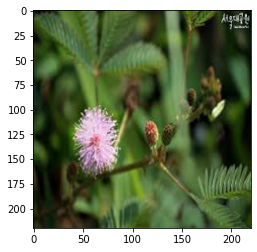

In [14]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()

In [15]:
y_train.shape

(21303, 296)

In [16]:
(y_train[1], categories[y_train[0].argmax()])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0])